# Microsoft Movie Studios

**Author:** Jeffrey W Beech
***

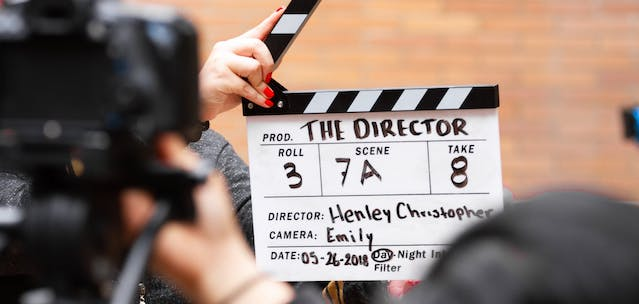

## Overview

This project analyzes the creative needs of <a href="http://www.microsoft.com">Microsoft</a>, an expansive computer software and hardware manufacturer.  Microsoft has made a strategic decision to create a new movie studio. Analysis of popular film genres and financial data from the Internet Movie Database <a href="http://www.imdb.com/interfaces/">(IMDb)</a> clearly shows that top grossing films are centered around a few film types.  Additionaly, one studio group stands out as the creative leader in these genres.  Microsoft can use this analysis to set visioning, hiring practices, property acqusition and advertising for their initial resource allocation.

## Business Problem

Microsoft has decided to expand its considerable expertise into the area of producing feature films.  As a new entry into this competitive and creative arena, they need an analysis of the types of films that are doing best at the box office.  Using data from the Internet Movie Database <a href="http://www.imdb.com/interfaces/">(IMDb)</a>  and Box Office Mojo<a href="http://www.boxofficemojo.com/"> (BOM)</a>, I will describe patterns from succesful production houses. By analyzing and comparing film generes, gross receipts, year to year consistency and studio success, this analysis will aid Microsoft in clarifying the vision, culture and resource management for their new subsidiary.

## Data Understanding

The three data sets we are using are from the Internet Movie Database (IMDb) and a subsiderary company, Box Office Mojo (BOM).  Both are owned by Amazon, and represent the largest repository of film data available.  These files have information about movie genres, gross receipts domestically and abroad, plus basic things like titles, release year, studios, runtime, etc.

In [1]:
# Import relevant modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('data/title.basics.csv')
df2 = pd.read_csv('data/title.ratings.csv')
df3 = pd.read_csv('data/bom.movie_gross.csv')
df4 = pd.read_csv('data/tn.movie_budgets.csv')

df1.shape, df2.shape, df3.shape, df3.shape

((146144, 6), (73856, 3), (3387, 5), (3387, 5))

In [3]:
!ls

Images              data                jeff_notebook.ipynb
README.md           google-slide-link   matt-notebook.ipynb


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### DF1

This data set contains titles, premiere year, runtime and film genres, along with an index.

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
df1['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [10]:
df1['genres'].value_counts()

Documentary                 32185
Drama                       21486
Comedy                       9177
Horror                       4372
Comedy,Drama                 3519
                            ...  
Biography,Music,Romance         1
History,Musical,Romance         1
Romance,Thriller,War            1
Biography,Reality-TV            1
Biography,Comedy,Musical        1
Name: genres, Length: 1085, dtype: int64

In [11]:
len(df1['tconst'].unique()) # the output matches the number of entries for 'tconst'.  The values are unique

146144

### DF2

This data set contains fan rating and voting information along with an index.

In [12]:
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
df2['averagerating'].value_counts(bins=10)

(6.4, 7.3]     19088
(5.5, 6.4]     16563
(7.3, 8.2]     12473
(4.6, 5.5]      9861
(3.7, 4.6]      5452
(8.2, 9.1]      5354
(2.8, 3.7]      2819
(1.9, 2.8]      1112
(9.1, 10.0]      715
(0.99, 1.9]      419
Name: averagerating, dtype: int64

In [14]:
df2['numvotes'].value_counts(bins=12)

(-1836.062, 153426.75]     73443
(153426.75, 306848.5]        243
(306848.5, 460270.25]         91
(460270.25, 613692.0]         45
(613692.0, 767113.75]         22
(767113.75, 920535.5]          4
(920535.5, 1073957.25]         3
(1073957.25, 1227379.0]        2
(1687644.25, 1841066.0]        1
(1380800.75, 1534222.5]        1
(1227379.0, 1380800.75]        1
(1534222.5, 1687644.25]        0
Name: numvotes, dtype: int64

In [15]:
len(df2['tconst'].unique()) # the output matches the number of entries for 'tconst'.  The values are unique

73856

## DF3

This data set contains titles, production studio, year of release from 2010 - 2018, and domestic and foreign gross receipts.

In [16]:
df3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [18]:
df3['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Magn.         136
Fox           136
             ... 
CineGalaxy      1
Synergetic      1
NAV             1
IW              1
PalUni          1
Name: studio, Length: 257, dtype: int64

In [19]:
df3['year'].value_counts()

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

In [20]:
# Updating column names for readability in graphs
df3['studio'].replace({"WB (NL)": "WB"}, inplace=True)
df3['studio'].replace({"WB": "Warner Bros", 'BV': 'Disney', 'Uni.': "Universal", 'P/DW': 'DreamWorks', 'Par.': 'Paramount'}, inplace=True)
df3['studio'].value_counts()

Warner Bros    185
IFC            166
Universal      147
Magn.          136
Fox            136
              ... 
BGP              1
Viv.             1
ITL              1
SDS              1
DR               1
Name: studio, Length: 256, dtype: int64

## My initial process:

In the initial view of the three data files, a few things stood out.
1.  All three files had low number of null values.
2.  The two files from IMDB had an index that appeared to be common between the them.
3.  The file containing the gross receipts info had considerably less rows than the other two.  This file
    is going to strongly influence the size of the merged data set.

## Data Preparation

Each dataset contains pieces of information vital to making an analysis.  My process is:
    
    Doing an inner merge on df1 and df2 by 'tconst' to create the dataset df_imbd
    Doing an inner merge on df_imbd and df3 by 'title' to create a complete dataset.
    Cleaning up the data:
        1.  Delete the 'original_title', 'start_year' and the 'runtime_minutes" columns
        2.  Change the foreign_gross column to float64 Dtype from object Dtype
        3.  Add a column that is the sum of 'domestic_gross' and 'foreign_gross' entitled 'worldwide_gross'
        4.  Delete duplicates in the title column

### Merging datasets

This will merge df1 and df2 by their common index numbers, and will drop the 'tconst' rows that are not common between the two datasets.

In [21]:
df_imdb = df1.merge(df2, on="tconst", how = 'left')
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


Now we'll merge the IMBd data with the BOM data, which has all the gross receipts details.  The commonality between these files is the titles; of the 3387 rows in the BOM data file, 3025 of them have matching data in the 'title' column with the 'primary_title' column in the IMDb file.  

In [22]:
df_imdb['primary_title'].isin(df3['title']).value_counts()

False    142780
True       3364
Name: primary_title, dtype: int64

First, we'll rename the 'primary_title' column in 'df_imdb' to 'title'

In [23]:
df_imdb.rename(columns={'primary_title': 'title'}, inplace=True)

In [24]:
df_bom = df3.drop(['domestic_gross','foreign_gross'], axis = 1)

In [25]:
df4.rename(columns={'movie': 'title'}, inplace=True)
df4

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   title              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [27]:
df_money = df_bom.merge(df4, on = 'title', how = 'right')
df_money

,title,studio,year,id,release_date,production_budget,domestic_gross,worldwide_gross
0,Avatar,NaN,NaN,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,Disney,2011.0,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,NaN,NaN,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,Disney,2015.0,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,NaN,NaN,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...,...,...
5777,Red 11,NaN,NaN,78,"Dec 31, 2018","$7,000",$0,$0
5778,Following,NaN,NaN,79,"Apr 2, 1999","$6,000","$48,482","$240,495"
5779,Return to the Land of Wonders,NaN,NaN,80,"Jul 13, 2005","$5,000","$1,338","$1,338"
5780,A Plague So Pleasant,NaN,NaN,81,"Sep 29, 2015","$1,400",$0,$0


Now we'll do an inner merge on the 'title' column..

In [28]:
df_all3 = df_imdb.merge(df_money, on="title", how = 'right')

In [29]:
df_all3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 0 to 7220
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             3815 non-null   object 
 1   title              7221 non-null   object 
 2   original_title     3814 non-null   object 
 3   start_year         3815 non-null   float64
 4   runtime_minutes    3328 non-null   float64
 5   genres             3743 non-null   object 
 6   averagerating      2875 non-null   float64
 7   numvotes           2875 non-null   float64
 8   studio             1681 non-null   object 
 9   year               1682 non-null   float64
 10  id                 7221 non-null   int64  
 11  release_date       7221 non-null   object 
 12  production_budget  7221 non-null   object 
 13  domestic_gross     7221 non-null   object 
 14  worldwide_gross    7221 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 902.6+ KB


### Data Cleaning

In [30]:
#df_all3 = df_all3.drop(['original_title', 'start_year', 'runtime_minutes'], axis=1) 
#df_all3.info()
df_all3['domestic_gross'] = df_all3['domestic_gross'].apply(str).str.replace(r"[a-zA-Z$,]",'')
df_all3['worldwide_gross'] = df_all3['worldwide_gross'].apply(str).str.replace(r"[a-zA-Z$,]",'')

In [31]:
df_all3['domestic_gross'] = pd.to_numeric(df_all3['domestic_gross'], errors = 'coerce')
df_all3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 0 to 7220
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             3815 non-null   object 
 1   title              7221 non-null   object 
 2   original_title     3814 non-null   object 
 3   start_year         3815 non-null   float64
 4   runtime_minutes    3328 non-null   float64
 5   genres             3743 non-null   object 
 6   averagerating      2875 non-null   float64
 7   numvotes           2875 non-null   float64
 8   studio             1681 non-null   object 
 9   year               1682 non-null   float64
 10  id                 7221 non-null   int64  
 11  release_date       7221 non-null   object 
 12  production_budget  7221 non-null   object 
 13  domestic_gross     7221 non-null   int64  
 14  worldwide_gross    7221 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 902.6+ KB


In [32]:
df_all3['worldwide_gross'] = pd.to_numeric(df_all3['worldwide_gross'], errors = 'coerce')

In [33]:
df_all3 = df_all3.drop_duplicates(subset=['title'])

In [34]:
# df_all3['foreign_gross'] = df_all3['foreign_gross'].fillna(0)

# df_all3.insert(loc = 8,
#          column = 'worldwide_gross',
#          value = 0) # insert column 'worldwide_gross'
# df_all3['worldwide_gross'] = df_all3.apply(lambda row: row['domestic_gross'] + row['foreign_gross'], axis=1)

In [35]:
df_all3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 7220
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2312 non-null   object 
 1   title              5698 non-null   object 
 2   original_title     2312 non-null   object 
 3   start_year         2312 non-null   float64
 4   runtime_minutes    2138 non-null   float64
 5   genres             2287 non-null   object 
 6   averagerating      2033 non-null   float64
 7   numvotes           2033 non-null   float64
 8   studio             1237 non-null   object 
 9   year               1238 non-null   float64
 10  id                 5698 non-null   int64  
 11  release_date       5698 non-null   object 
 12  production_budget  5698 non-null   object 
 13  domestic_gross     5698 non-null   int64  
 14  worldwide_gross    5698 non-null   int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 712.2+ KB


In [36]:
# Save cleaned dataset as CSV
df_all3.to_csv('./data/df_all3.csv')

## Analysis

## Top Grossing Films

### Top Grossing Films

We'll look at the most obvious stat first - top 25 grossing films worldwide by title.

In [37]:
# pd.set_option("display.max_rows", None,) # allows viewing the entire data frame

In [38]:
df_topwwg = df_all3.nlargest(15,'worldwide_gross') # top 25 films sorted by 'worldwide_gross'
# df_topwwg['worldwide_gross'] = ['${:.2f}M'.format(x) for x in df_topwwg['worldwide_gross']/10000000]
df_topwwg_select = df_topwwg[['title', 'genres', 'year', 'studio','worldwide_gross', 'domestic_gross']]
df_topwwg_select

,title,genres,year,studio,worldwide_gross,domestic_gross
0,Avatar,Horror,NaN,NaN,2776345279,760507625
54,Titanic,Adventure,NaN,NaN,2208208395,659363944
5,Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,2053311220,936662225
6,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2018.0,Disney,2048134200,678815482
34,Jurassic World,"Action,Adventure,Sci-Fi",2015.0,Universal,1648854864,652270625
85,Furious 7,"Action,Crime,Thriller",2015.0,Universal,1518722794,353007020
26,The Avengers,"Action,Adventure,Sci-Fi",NaN,NaN,1517935897,623279547
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",2015.0,Disney,1403013963,459005868
53,Black Panther,"Action,Adventure,Sci-Fi",2018.0,Disney,1348258224,700059566
388,Harry Potter and the Deathly Hallows: Part II,NaN,NaN,NaN,1341693157,381193157


In [39]:
df_topwwg_select['year'].value_counts() # checking the range of years

2018.0    4
2015.0    3
2013.0    1
Name: year, dtype: int64

In [40]:
#df['Marks'] = df['Marks'].astype(str)
df_select = df_topwwg_select.copy()
# df_select['worldwide_gross'] = df_topwwg_select['worldwide_gross'].astype(str)
# df_select['domestic_gross'] = df_topwwg_select['domestic_gross'].astype(str)
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 56
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            15 non-null     object 
 1   genres           12 non-null     object 
 2   year             8 non-null      float64
 3   studio           8 non-null      object 
 4   worldwide_gross  15 non-null     int64  
 5   domestic_gross   15 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 840.0+ bytes


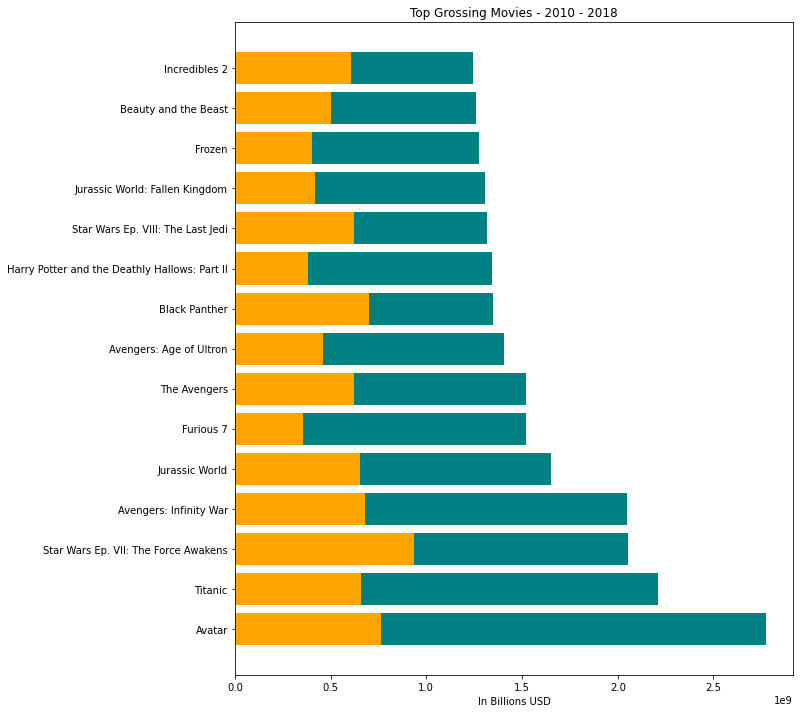

In [41]:
# Create plot
fig, ax = plt.subplots(figsize = (10,12))
title = df_select['title']
ww_gross = df_select['worldwide_gross']
d_gross = df_select['domestic_gross']

plt.title('Top Grossing Movies - 2010 - 2018');
plt.xlabel('In Billions USD');

Domestic = ax.barh(title, ww_gross, color = 'teal')
World = ax.barh(title, d_gross, color = 'orange')
plt.show()

TypeError: the dtypes of parameters y (object) and height (float64) are incompatible

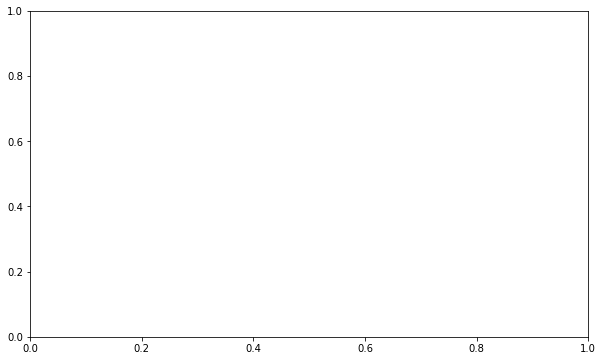

In [42]:
fig, ax = plt.subplots(figsize = (10,6))
studio = df_select['studio']
ww_gross = df_select['worldwide_gross']
d_gross = df_select['domestic_gross']

World = ax.barh(studio, ww_gross, color = 'teal')
Domestic = ax.barh(studio, d_gross, color = 'orange')

ax.set_title('Top Grossing Movie Studios - 2010 - 2018');
ax.set_xlabel('In Billions USD')
ax.set_ylabel('Studio')

plt.show()